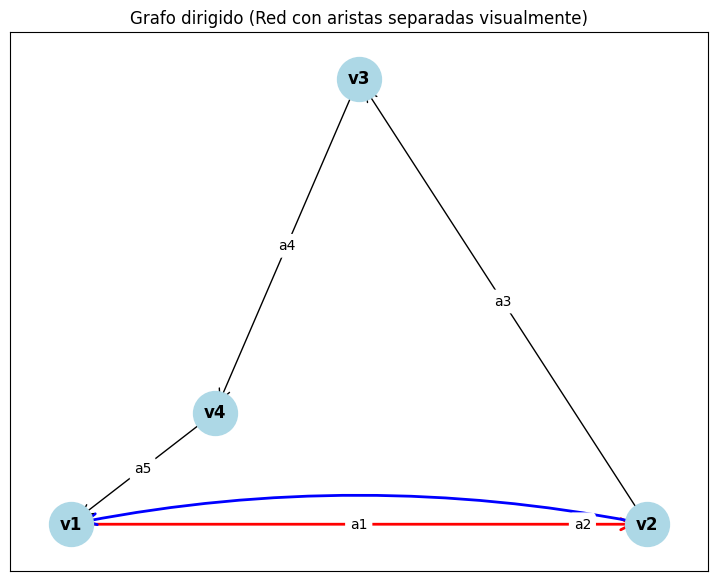

Matriz de Adyacencia (A):
    v1  v2  v3  v4
v1   0   1   0   0
v2   1   0   1   0
v3   0   0   0   1
v4   1   0   0   0

Matriz de Recorrido (R):
    v1  v2  v3  v4
v1   0   1   0   0
v2   1   0   1   0
v3   0   0   0   1
v4   1   0   0   0

Matriz de Distancias (dij = min_conexiones de Vi a Vj):
   v1 v2 v3 v4
v1  0  1  2  3
v2  1  0  1  2
v3  2  3  0  1
v4  1  2  3  0


In [ ]:
import networkx as nx # Importa la librería NetworkX para trabajar con grafos
import matplotlib.pyplot as plt # Importa la librería Matplotlib para visualizar el grafo
import numpy as np # Importa la librería NumPy para operaciones numéricas
import pandas as pd # Importa la librería Pandas para trabajar con DataFrames (estructuras de datos tabulares)

# Definición de los nodos del grafo
nodos = ['v1', 'v2', 'v3', 'v4']

# Definición de las aristas dirigidas del grafo. Cada tupla representa una arista (origen, destino)
aristas = [
    ('v1', 'v2'),  # a1: Arista del nodo v1 al nodo v2
    ('v2', 'v1'),  # a2: Arista del nodo v2 al nodo v1
    ('v2', 'v3'),  # a3: Arista del nodo v2 al nodo v3
    ('v3', 'v4'),  # a4: Arista del nodo v3 al nodo v4
    ('v4', 'v1')   # a5: Arista del nodo v4 al nodo v1
]

# Crear un grafo dirigido vacío
G = nx.DiGraph()
# Agregar los nodos definidos al grafo
G.add_nodes_from(nodos)
# Agregar las aristas definidas al grafo
G.add_edges_from(aristas)

# Definir coordenadas explícitas para los nodos para una mejor visualización
# Cambiamos las coordenadas para formar una figura geometrica diferente (un triángulo con un punto extra)
pos = {
    'v1': (0, 0),    # Origen o un vértice
    'v2': (2, 0),    # Otro vértice
    'v3': (1, 2),    # Tercer vértice
    'v4': (0.5, 0.5) # Un punto dentro o cerca del triángulo
}


# Configurar el tamaño de la figura para dibujar el grafo
plt.figure(figsize=(9,7))
# Calcular la posición de los nodos para la visualización usando el algoritmo circular_layout
# Usamos circular_layout para una disposición más clara, que podría ayudar a separar las aristas entre v1 y v2
# pos = nx.circular_layout(G) # Comentamos esta línea ya que definimos 'pos' explícitamente
# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)
# Dibujar las aristas
# Dibujamos las aristas de forma separada para intentar una mejor visualización
nx.draw_networkx_edges(G, pos, edgelist=[('v1', 'v2')], arrowstyle='->', arrowsize=20, edge_color='red', width=2) # Arista a1
nx.draw_networkx_edges(G, pos, edgelist=[('v2', 'v1')], arrowstyle='->', arrowsize=20, edge_color='blue', width=2, connectionstyle='arc3,rad=0.1') # Arista a2 con curvatura
nx.draw_networkx_edges(G, pos, edgelist=[('v2', 'v3'), ('v3', 'v4'), ('v4', 'v1')], arrowstyle='->', arrowsize=20, width=1) # Otras aristas
# Dibujar etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
# Dibujar etiquetas en las aristas usando un diccionario que mapea las aristas a sus nombres
edge_labels = {
    ('v1', 'v2'): 'a1',
    ('v2', 'v1'): 'a2',
    ('v2', 'v3'): 'a3',
    ('v3', 'v4'): 'a4',
    ('v4', 'v1'): 'a5'
}
# Ajustamos la posición de las etiquetas de las aristas para que no se superpongan con la curvatura
# Dibujar las etiquetas de las aristas. Ajustamos label_pos para la arista curva si es necesario.
nx.draw_networkx_edge_labels(G, pos, edge_labels={('v1', 'v2'): 'a1'}, rotate=False, label_pos=0.5) # Etiqueta para a1
nx.draw_networkx_edge_labels(G, pos, edge_labels={('v2', 'v1'): 'a2'}, rotate=False, label_pos=0.1) # Etiqueta para a2 (ajustada la posición)
nx.draw_networkx_edge_labels(G, pos, edge_labels={('v2', 'v3'): 'a3', ('v3', 'v4'): 'a4', ('v4', 'v1'): 'a5'}, rotate=False, label_pos=0.5) # Etiquetas para las otras aristas

# Establecer el título del gráfico
plt.title("Grafo dirigido (Red con aristas separadas visualmente)")
# Mostrar el gráfico del grafo
plt.show()

# Crear la matriz de adyacencia del grafo. Representa las conexiones directas entre nodos.
matriz_ady = nx.adjacency_matrix(G, nodelist=nodos).todense()
print("Matriz de Adyacencia (A):")
df_A = pd.DataFrame(matriz_ady, index=nodos, columns=nodos)
print(df_A)

# Crear la matriz de recorrido (alcanzabilidad). Indica si es posible ir de un nodo a otro en uno o más pasos.
# Aunque la matriz de recorrido (R) indica si es *posible* llegar,
# la matriz dij que calcularemos a continuación indica el *mínimo* número de pasos.
matriz_recorrido = (matriz_ady != 0).astype(int) # Descomentada para incluir la matriz de recorrido
print("\nMatriz de Recorrido (R):") # Descomentada para incluir la matriz de recorrido
df_R = pd.DataFrame(matriz_recorrido, index=nodos, columns=nodos) # Descomentada para incluir la matriz de recorrido
print(df_R)


# =========================
# Matriz de distancias (dij)
# =========================
# Usamos el algoritmo de Dijkstra (implementado en nx.all_pairs_shortest_path_length para grafos no ponderados)
# para encontrar la longitud del camino más corto (mínimo número de aristas) entre cada par de nodos.
longitudes = dict(nx.all_pairs_shortest_path_length(G))

# Convertimos las distancias a una matriz
matriz_dij = np.full((len(nodos), len(nodos)), np.inf)  # Inicializamos con infinito

for i, origen in enumerate(nodos):
    for j, destino in enumerate(nodos):
        if destino in longitudes[origen]:
            matriz_dij[i][j] = longitudes[origen][destino]

# Convertimos infinito a un símbolo visualmente claro (ej. "-") solo para mostrar
matriz_dij_mostrada = pd.DataFrame(
    np.where(matriz_dij == np.inf, '-', matriz_dij.astype(int)),
    index=nodos, columns=nodos
)

print("\nMatriz de Distancias (dij = min_conexiones de Vi a Vj):")
print(matriz_dij_mostrada)

R= de alcancibilidad y consultar la matriz de dij

Definiciones de las matrices:

**Matriz de Adyacencia (A):** Como mencionamos anteriormente, la matriz de adyacencia representa las conexiones directas entre los nodos de un grafo. Para un grafo con n nodos, es una matriz cuadrada de tamaño n x n. El elemento A[i][j] es 1 si existe una arista directa del nodo i al nodo j, y 0 en caso contrario. En el código de ejemplo que ejecutaste, se imprimió esta matriz.

**Matriz de Recorrido (R)** o Alcanzabilidad: La matriz de recorrido (o alcanzabilidad) indica si es posible llegar de un nodo a otro, ya sea directamente (con una arista) o a través de un camino de uno o más pasos. Para un grafo con n nodos, es una matriz cuadrada de tamaño n x n. El elemento R[i][j] es 1 si existe al menos un camino desde el nodo i al nodo j, y 0 en caso contrario. En el código que ejecutaste, la matriz de recorrido R se calculó a partir de la matriz de adyacencia A indicando si hay una conexión directa (A[i][j] != 0). Sin embargo, una matriz de alcanzabilidad más completa (usando el algoritmo de Warshall, por ejemplo) consideraría caminos de cualquier longitud.

**la matriz de dij**
Esto generalmente se refiere a la matriz de caminos más cortos, a menudo calculada con el algoritmo de Dijkstra.

El algoritmo de Dijkstra se utiliza para encontrar los caminos más cortos ponderados.

El **algoritmo de Dijkstra ** es un algoritmo muy conocido en teoría de grafos que se utiliza para encontrar los caminos más cortos desde un nodo de inicio único a todos los demás nodos en un grafo con aristas no negativas.

Aquí tienes los puntos clave:

**Propósito:** Encontrar el camino de menor costo (o distancia) entre un nodo de origen y todos los demás nodos accesibles.

**Requisito:** Las aristas del grafo deben tener pesos (o "costos"), y estos pesos deben ser no negativos.

**Cómo funciona (idea general):** Comienza en el nodo de origen y explora el grafo, expandiéndose hacia los nodos vecinos. Mantiene un registro de la distancia más corta conocida desde el origen a cada nodo y actualiza estas distancias a medida que encuentra caminos más cortos. Utiliza una cola de prioridad para seleccionar el siguiente nodo a visitar, eligiendo siempre el nodo con la distancia conocida más corta que aún no ha sido "visitado" por completo.

**Resultado:** Al finalizar, el algoritmo proporciona la distancia más corta desde el nodo de origen a todos los demás nodos, y a menudo también permite reconstruir los caminos más cortos.

En resumen, es una herramienta fundamental para resolver problemas de "camino más corto" en redes donde las conexiones tienen costos positivos.

La **teoría de grafos** es una rama de las matemáticas y la informática que estudia las propiedades de los grafos, que son estructuras discretas compuestas por un conjunto de **vértices (también llamados nodos)** y un conjunto de **aristas (también llamadas enlaces o líneas)** que conectan pares de vértices.

Los grafos son herramientas muy versátiles para modelar una gran variedad de sistemas y relaciones en el mundo real.

Ejemplos de grafos:

**Redes sociales:** Los vértices son personas y las aristas representan la amistad o conexión entre ellas.

**Mapas de carreteras:** Los vértices son ciudades y las aristas son las carreteras que las conectan.

**Internet:** Los vértices son ordenadores o servidores y las aristas son las conexiones de red.

**Circuitos eléctricos:** Los vértices son componentes (como resistencias, capacitores) y las aristas son los cables que los unen.

**Estructuras moleculares:** Los vértices son átomos y las aristas son los enlaces químicos.

Tipos de grafos:

Existen diferentes tipos de grafos, pero los dos más fundamentales son:

**Grafo no dirigido:** Las aristas no tienen una dirección específica. Si hay una arista entre el vértice A y el vértice B, significa que la conexión es en ambos sentidos (de A a B y de B a A). El grafo que mostramos en el código de ejemplo no es un grafo no dirigido.

**Ejemplo:** Una red social donde la amistad es mutua. Si A es amigo de B, B también es amigo de A.

**Grafo dirigido (o digrafo):** Las aristas tienen una dirección específica. Una arista del vértice A al vértice B significa que hay una conexión de A a B, pero no necesariamente de B a A. El grafo que mostramos en el código de ejemplo sí es un grafo dirigido.

**Ejemplo:** Calles de sentido único en un mapa de carreteras, o el flujo de información en una red.
Características de los grafos:

**Adyacencia:** Dos vértices son adyacentes si están conectados directamente por una arista. La matriz de adyacencia (A) es una forma de representar esta relación. Es una matriz cuadrada donde las filas y columnas corresponden a los vértices. El elemento en la fila i y columna j es 1 si hay una arista del vértice i al vértice j, y 0 en caso contrario. En un grafo no dirigido, la matriz de adyacencia es simétrica. En el código de ejemplo, se imprime la matriz de adyacencia.

**Incidencia:** La matriz de incidencia (I) es otra forma de representar un grafo. Es una matriz con filas que representan los vértices y columnas que representan las aristas. Para un grafo dirigido, el elemento en la fila i y columna j es:

1 si la arista j sale del vértice i.

-1 si la arista j entra al vértice i.

0 si la arista j no está conectada al vértice i.

Para un grafo no dirigido, el elemento es 1 si el vértice i es un extremo de la arista j, y 0 en caso contrario.

**Grado de un vértice:**

En un grafo no dirigido, el grado de un vértice es el número de aristas conectadas a él.

En un grafo dirigido, tenemos el grado de salida (número de aristas que salen del vértice) y el grado de entrada (número de aristas que entran al vértice). La ley "handshaking" (o lema del apretón de manos) establece que, en un grafo no dirigido, la suma de los grados de todos los vértices es igual al doble del número de aristas. Esto se debe a que cada arista contribuye al grado de dos vértices.

**Trayectoria (o camino):** Una trayectoria en un grafo es una secuencia de vértices conectados por aristas. Por ejemplo, en el grafo de ejemplo, v1 -> v2 -> v3 -> v4 es una trayectoria. La longitud de la trayectoria es el número de aristas que contiene.

En el código de ejemplo que proporcionaste, se crea un grafo dirigido, se visualiza y se calculan la matriz de adyacencia, la matriz de recorrido y la matriz de distancias (dij), que representa la longitud del camino más corto entre pares de nodos.

# **Multiplicación de Matrices Manualmente:**

La multiplicación de matrices puede parecer un poco complicada al principio, pero sigue un proceso definido. Para multiplicar dos matrices, digamos la matriz A y la matriz B para obtener una matriz resultado C = A * B, se deben cumplir ciertas condiciones:

**Condición:** El número de columnas de la primera matriz (A) debe ser igual al número de filas de la segunda matriz (B).

Si A es una matriz de tamaño m x n (m filas y n columnas) y B es una matriz de tamaño n x p (n filas y p columnas), la matriz resultado C será de tamaño m x p (m filas y p columnas).

**Proceso paso a paso para calcular un elemento C[i][j] de la matriz resultado:**

Para obtener el elemento en la fila i y la columna j de la matriz resultado C (C[i][j]), debes hacer lo siguiente:

Toma la fila i de la matriz A.
Toma la columna j de la matriz B.
Multiplica el primer elemento de la fila i de A por el primer elemento de la columna j de B.
Multiplica el segundo elemento de la fila i de A por el segundo elemento de la columna j de B.
Continúa este proceso hasta multiplicar el último elemento de la fila i de A por el último elemento de la columna j de B.
Suma todos estos productos. El resultado es el valor del elemento C[i][j].

**En notación matemática:**

Si A es una matriz de tamaño m x n y B es una matriz de tamaño n x p, entonces el elemento C[i][j] de la matriz resultado C = A * B (donde 1 ≤ i ≤ m y 1 ≤ j ≤ p) se calcula como:

C[i][j] = Σ (A[i][k] * B[k][j]) para k desde 1 hasta n.

Esto significa que sumas los productos de los elementos correspondientes de la fila i de A y la columna j de B.

Ejemplo:

Supongamos que tienes dos matrices:

A = | 1 2 | | 3 4 |

(Tamaño 2x2)

B = | 5 6 | | 7 8 |

(Tamaño 2x2)

La matriz resultado C = A * B será de tamaño 2x2.

Calculando cada elemento de C:

C[1][1] (Fila 1 de A, Columna 1 de B): (1 * 5) + (2 * 7) = 5 + 14 = 19
C[1][2] (Fila 1 de A, Columna 2 de B): (1 * 6) + (2 * 8) = 6 + 16 = 22
C[2][1] (Fila 2 de A, Columna 1 de B): (3 * 5) + (4 * 7) = 15 + 28 = 43
C[2][2] (Fila 2 de A, Columna 2 de B): (3 * 6) + (4 * 8) = 18 + 32 = 50
Por lo tanto, la matriz resultado C es:

C = | 19 22 | | 43 50 |

Este proceso se repite para cada elemento de la matriz resultado.

# **Algoritmo de Dijkstra**

El algoritmo de Dijkstra es un algoritmo muy conocido en teoría de grafos que se utiliza para encontrar los caminos más cortos desde un nodo de inicio único a todos los demás nodos en un grafo con aristas no negativas.

Aquí tienes los puntos clave:

**Propósito:** Encontrar el camino de menor costo (o distancia) entre un nodo de origen y todos los demás nodos accesibles.

**Requisito**: Las aristas del grafo deben tener pesos (o "costos"), y estos pesos deben ser no negativos.

**Cómo funciona (idea general):** Comienza en el nodo de origen y explora el grafo, expandiéndose hacia los nodos vecinos. Mantiene un registro de la distancia más corta conocida desde el origen a cada nodo y actualiza estas distancias a medida que encuentra caminos más cortos. Utiliza una cola de prioridad para seleccionar el siguiente nodo a visitar, eligiendo siempre el nodo con la distancia conocida más corta que aún no ha sido "visitado" por completo.

**Resultado:** Al finalizar, el algoritmo proporciona la distancia más corta desde el nodo de origen a todos los demás nodos, y a menudo también permite reconstruir los caminos más cortos.
En resumen, es una herramienta fundamental para resolver problemas de "camino más corto" en redes donde las conexiones tienen costos positivos.

# Algoritmo de Yen

El algoritmo de Yen es un algoritmo utilizado para encontrar los K caminos más cortos que no son necesariamente disjuntos entre dos nodos específicos en un grafo dirigido o no dirigido con pesos en las aristas. A diferencia de Dijkstra, que encuentra un camino más corto desde un origen a todos los demás, el algoritmo de Yen busca los varios caminos más cortos en orden de longitud.

Aquí tienes los puntos clave:

**Propósito:** Encontrar los K caminos más cortos (donde K es un número entero especificado) entre un nodo de origen y un nodo de destino.

**Requisito:** Puede trabajar con grafos dirigidos o no dirigidos. Las aristas pueden tener pesos. Los caminos encontrados no son necesariamente disjuntos (pueden compartir nodos y aristas).

**Cómo funciona (idea general):** El algoritmo de Yen se basa en una modificación iterativa del algoritmo de Dijkstra (o un algoritmo similar de camino más corto). En cada iteración, encuentra el camino más corto actual (utilizando Dijkstra o similar). Luego, "bloquea" o modifica temporalmente el grafo para eliminar este camino como la única opción más corta y busca el siguiente camino más corto en el grafo modificado. Este proceso se repite K veces para encontrar los K caminos más cortos.

**Aplicaciones:** Es útil en situaciones donde no solo se necesita el camino más óptimo, sino también alternativas con costos ligeramente superiores, por ejemplo, en sistemas de navegación para ofrecer rutas alternativas, o en análisis de redes para identificar rutas de respaldo.

En resumen, mientras que Dijkstra encuentra el camino más corto único desde un origen, Yen encuentra los K caminos más cortos entre un par específico de nodos, proporcionando una lista de opciones en orden ascendente de longitud.